#🛠️ Preparación de los Datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
datos = pd.read_csv("/content/drive/MyDrive/datos_tratados.csv")

In [4]:
datos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaymentMethod,MCharges,TCharges,DCharges
0,0002-ORFBO,0,Female,0,1,1,9,1,DSL,One year,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,DSL,Month-to-month,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,Fiber optic,Month-to-month,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,Fiber optic,Month-to-month,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,Fiber optic,Month-to-month,Mailed check,83.9,267.40,2.796667


In [5]:
datos.drop("customerID",axis=1,inplace=True)
datos.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaymentMethod,MCharges,TCharges,DCharges
0,0,Female,0,1,1,9,1,DSL,One year,Mailed check,65.6,593.30,2.186667
1,0,Male,0,0,0,9,1,DSL,Month-to-month,Mailed check,59.9,542.40,1.996667
2,1,Male,0,0,0,4,1,Fiber optic,Month-to-month,Electronic check,73.9,280.85,2.463333
3,1,Male,1,1,0,13,1,Fiber optic,Month-to-month,Electronic check,98.0,1237.85,3.266667
4,1,Female,1,1,0,3,1,Fiber optic,Month-to-month,Mailed check,83.9,267.40,2.796667


In [6]:
X = datos.drop("Churn",axis=1)
y = datos["Churn"]

In [7]:
columnas = X.columns

In [8]:
one_hot = make_column_transformer((OneHotEncoder(),
          ["gender","InternetService","Contract","PaymentMethod"]),
          remainder="passthrough",
          sparse_threshold=0,
          force_int_remainder_cols=False)

In [9]:
X = one_hot.fit_transform(X)

In [10]:
one_hot.get_feature_names_out(columnas)

array(['onehotencoder__gender_Female', 'onehotencoder__gender_Male',
       'onehotencoder__InternetService_DSL',
       'onehotencoder__InternetService_Fiber optic',
       'onehotencoder__InternetService_No',
       'onehotencoder__Contract_Month-to-month',
       'onehotencoder__Contract_One year',
       'onehotencoder__Contract_Two year',
       'onehotencoder__PaymentMethod_Bank transfer (automatic)',
       'onehotencoder__PaymentMethod_Credit card (automatic)',
       'onehotencoder__PaymentMethod_Electronic check',
       'onehotencoder__PaymentMethod_Mailed check',
       'remainder__SeniorCitizen', 'remainder__Partner',
       'remainder__Dependents', 'remainder__tenure',
       'remainder__PhoneService', 'remainder__MCharges',
       'remainder__TCharges', 'remainder__DCharges'], dtype=object)

In [11]:
normalizacion = MinMaxScaler()
X_normal = normalizacion.fit_transform(X)

In [12]:
X_normal_nombres = pd.DataFrame(X_normal,columns=one_hot.get_feature_names_out(columnas))

In [13]:
y.value_counts()

,count
Churn,
0,5398
1,1869


In [14]:
over_sampling = SMOTE()
x_over,y_over = over_sampling.fit_resample(X_normal,y)

In [15]:
y_over.value_counts()

,count
Churn,
0,5398
1,5398


In [16]:
under_sampling = NearMiss()
x_under,y_under = under_sampling.fit_resample(X_normal,y)

In [17]:
y_under.value_counts()

,count
Churn,
0,1869
1,1869


#🎯 Correlación y Selección de Variables

In [18]:
explicativas = pd.DataFrame(X_normal,columns=one_hot.get_feature_names_out(columnas))
explicativas.head()

,onehotencoder__gender_Female,onehotencoder__gender_Male,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,onehotencoder__Contract_Month-to-month,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check,remainder__SeniorCitizen,remainder__Partner,remainder__Dependents,remainder__tenure,remainder__PhoneService,remainder__MCharges,remainder__TCharges,remainder__DCharges
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.125000,1.0,0.471144,0.068315,0.471144
1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.125000,1.0,0.414428,0.062454,0.414428
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.055556,1.0,0.553731,0.032338,0.553731
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.180556,1.0,0.793532,0.142531,0.793532
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.041667,1.0,0.653234,0.030789,0.653234


In [19]:
todo = pd.concat([explicativas,pd.DataFrame(y,columns=["Churn"])],axis=1)
todo.head()

,onehotencoder__gender_Female,onehotencoder__gender_Male,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,onehotencoder__Contract_Month-to-month,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),...,onehotencoder__PaymentMethod_Mailed check,remainder__SeniorCitizen,remainder__Partner,remainder__Dependents,remainder__tenure,remainder__PhoneService,remainder__MCharges,remainder__TCharges,remainder__DCharges,Churn
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.125000,1.0,0.471144,0.068315,0.471144,0
1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.125000,1.0,0.414428,0.062454,0.414428,0
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.055556,1.0,0.553731,0.032338,0.553731,1
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.180556,1.0,0.793532,0.142531,0.793532,1
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.041667,1.0,0.653234,0.030789,0.653234,1


In [20]:
todo.corr()["Churn"].sort_values(ascending=False)

,Churn
Churn,1.000000
onehotencoder__Contract_Month-to-month,0.395584
onehotencoder__InternetService_Fiber optic,0.300949
onehotencoder__PaymentMethod_Electronic check,0.294626
remainder__MCharges,0.189866
remainder__DCharges,0.189866
remainder__SeniorCitizen,0.146733
remainder__PhoneService,0.012571
onehotencoder__gender_Female,0.009555
onehotencoder__gender_Male,-0.009555


<Axes: xlabel='remainder__TCharges', ylabel='Churn'>

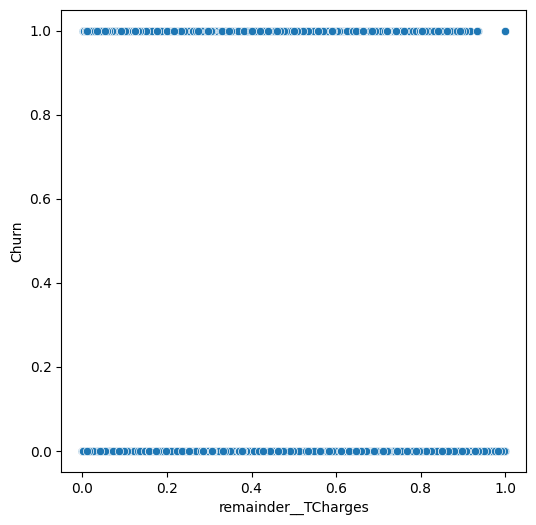

In [21]:
fig = plt.figure(figsize=(6,6))
sns.scatterplot(x="remainder__TCharges",y="Churn",data=todo)

<Axes: xlabel='remainder__tenure', ylabel='Churn'>

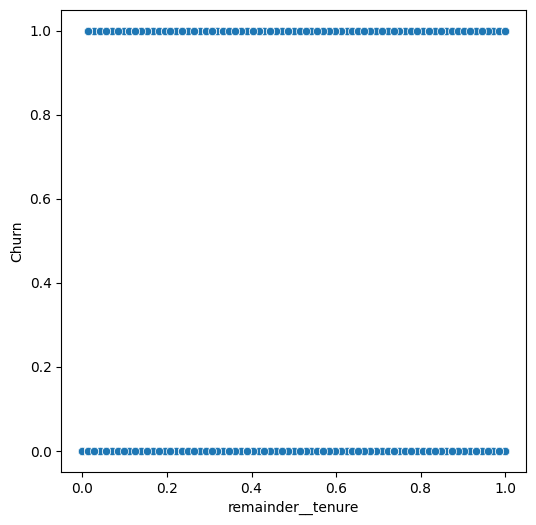

In [22]:
fig = plt.figure(figsize=(6,6))
sns.scatterplot(x="remainder__tenure",y="Churn",data=todo)

<Axes: xlabel='remainder__tenure'>

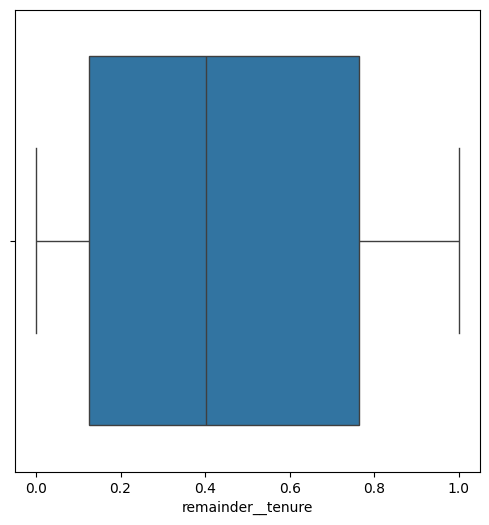

In [23]:
fig = plt.figure(figsize=(6,6))
sns.boxplot(x="remainder__tenure",data=todo)

<Axes: xlabel='remainder__TCharges'>

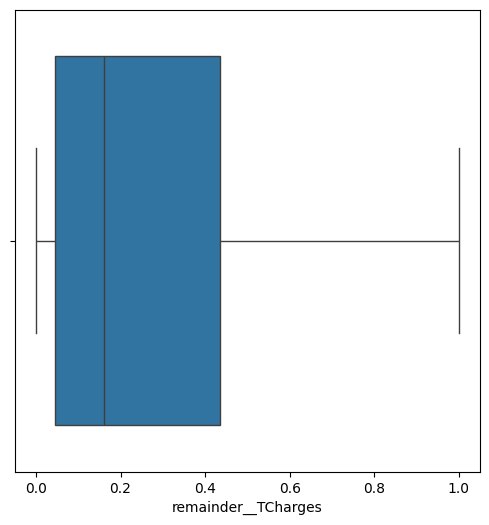

In [24]:
fig = plt.figure(figsize=(6,6))
sns.boxplot(x="remainder__TCharges",data=todo)

#🤖 Modelado Predictivo

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def calcular_regresion(y_test,y_pred):
  rmse = mean_squared_error(y_test,y_pred)
  mae= mean_absolute_error(y_test,y_pred)
  r2 = r2_score(y_test,y_pred)
  metricas = {
      'RMSE':round(rmse**(1/2),4),
      'MAE': round(mae,4),
      'R2': round(r2,4)
  }
  return metricas

In [26]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_normal_nombres,y,test_size=0.3,random_state=42)

baseline = DummyRegressor()
baseline.fit(X_train,y_train)

DummyRegressor()

In [27]:
y_pred_dummy = baseline.predict(X_test)
resultados_baseline = calcular_regresion(y_test, y_pred_dummy)
resultados_baseline

{'RMSE': 0.4299, 'MAE': 0.3786, 'R2': -0.0019}

##KNN

In [28]:
from sklearn.neighbors import KNeighborsRegressor
modelo_knn = KNeighborsRegressor(n_neighbors=43)
modelo_knn.fit(X_train,y_train)
ypred_knn = modelo_knn.predict(X_test)
resultados_knn = calcular_regresion(y_test,ypred_knn)
resultados_knn

{'RMSE': 0.3736, 'MAE': 0.2801, 'R2': 0.2432}

##Arboles de decicion

In [29]:
from sklearn.tree import DecisionTreeRegressor
modelo_arbol = DecisionTreeRegressor(max_depth=5,random_state=43)
modelo_arbol.fit(X_train,y_train)
ypred_arbol = modelo_arbol.predict(X_test)
resultados_arbol = calcular_regresion(y_test,ypred_arbol)
resultados_arbol

{'RMSE': 0.3689, 'MAE': 0.2666, 'R2': 0.2621}

In [30]:
importances = modelo_arbol.feature_importances_
feature_importances = pd.DataFrame({'Features':X_normal_nombres.columns,'Importances':(importances*100).round(2)}).sort_values('Importances',ascending=False)
feature_importances

,Features,Importances
5,onehotencoder__Contract_Month-to-month,51.52
15,remainder__tenure,17.34
3,onehotencoder__InternetService_Fiber optic,16.00
18,remainder__TCharges,7.41
2,onehotencoder__InternetService_DSL,2.79
19,remainder__DCharges,1.45
16,remainder__PhoneService,1.21
17,remainder__MCharges,0.96
10,onehotencoder__PaymentMethod_Electronic check,0.90
6,onehotencoder__Contract_One year,0.26


In [31]:
resultados = pd.DataFrame(index=['RMSE','MAE','R2'])
model_features = DecisionTreeRegressor(max_depth=5,random_state=43)
ct_features = [i if i != 0 else 1 for i in range(0,21,5)]

for i in ct_features:
  selected_features = feature_importances['Features'].values[:i]
  X_train_sel = X_train[selected_features]
  X_test_sel = X_test[selected_features]
  model_features.fit(X_train_sel, y_train)
  y_pred = model_features.predict(X_test_sel)
  metricas = calcular_regresion(y_test,y_pred)
  resultados[i] = list(metricas.values())

resultados

,1,5,10,15,20
RMSE,0.3958,0.3713,0.3689,0.3689,0.3689
MAE,0.3144,0.2696,0.2668,0.2666,0.2666
R2,0.1504,0.2523,0.2622,0.2621,0.2621


##Random Forest

In [32]:
from sklearn.ensemble import RandomForestRegressor
modelo_bosque = RandomForestRegressor(max_depth=4, random_state=43)
modelo_bosque.fit(X_train,y_train)
ypred = modelo_bosque.predict(X_test)
resultados_rf = calcular_regresion(y_test,ypred)
resultados_rf

{'RMSE': 0.3656, 'MAE': 0.2709, 'R2': 0.2751}

In [33]:
importances = modelo_bosque.feature_importances_
feature_importances = pd.DataFrame({'Features':X_normal_nombres.columns,'Importances':(importances*100).round(2)}).sort_values('Importances',ascending=False)
feature_importances

,Features,Importances
5,onehotencoder__Contract_Month-to-month,53.82
3,onehotencoder__InternetService_Fiber optic,16.13
15,remainder__tenure,15.85
18,remainder__TCharges,6.58
19,remainder__DCharges,1.92
17,remainder__MCharges,1.74
2,onehotencoder__InternetService_DSL,0.76
4,onehotencoder__InternetService_No,0.75
10,onehotencoder__PaymentMethod_Electronic check,0.69
16,remainder__PhoneService,0.63


In [34]:
resultados = pd.DataFrame(index=['RMSE','MAE','R2'])
model_features = RandomForestRegressor(max_depth=5,random_state=43)
ct_features = [i if i != 0 else 1 for i in range(0,21,5)]

for i in ct_features:
  selected_features = feature_importances['Features'].values[:i]
  X_train_sel = X_train[selected_features]
  X_test_sel = X_test[selected_features]
  model_features.fit(X_train_sel, y_train)
  y_pred = model_features.predict(X_test_sel)
  metricas = calcular_regresion(y_test,y_pred)
  resultados[i] = list(metricas.values())

resultados

,1,5,10,15,20
RMSE,0.3958,0.3666,0.3650,0.3642,0.3641
MAE,0.3145,0.2690,0.2674,0.2669,0.2670
R2,0.1504,0.2714,0.2776,0.2809,0.2810


##Evaluacion

In [35]:
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.model_selection import KFold, cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [36]:
def intervalo_confianza(resultados):
  promedio = resultados['test_score'].mean()
  desvio_std = resultados['test_score'].std()
  return f'El intervalo de confianza es: [{promedio-2*desvio_std},{min(promedio+2*desvio_std,1)}]'

In [37]:
modelo_DT = DecisionTreeClassifier(max_depth=5,random_state=43)
modelo_RF = RandomForestClassifier(max_depth=4, random_state=43)
modelo_KNN = KNeighborsClassifier(n_neighbors=35)

In [38]:
pipeline_DT_over = imbpipeline(steps=[('oversample',SMOTE()),('arbol',modelo_DT)])

skf_DT = StratifiedKFold(n_splits=5, shuffle=True,random_state=8)

cv_resultados =cross_validate(pipeline_DT_over,X_normal,y,cv=skf_DT,scoring='recall')

intervalo_confianza(cv_resultados)

'El intervalo de confianza es: [0.7197289587032291,0.8565208441669806]'

In [39]:
pipeline_DT_under = imbpipeline(steps=[('undersample',NearMiss(version = 3)),('arbol',modelo_DT)])

skf_DT = StratifiedKFold(n_splits=5, shuffle=True,random_state=8)

cv_resultados =cross_validate(pipeline_DT_over,X_normal,y,cv=skf_DT,scoring='recall')

intervalo_confianza(cv_resultados)

'El intervalo de confianza es: [0.6931061905335398,0.8745616565224164]'

In [40]:
pipeline_RF_over = imbpipeline(steps=[('oversample',SMOTE()),('bosque',modelo_RF)])

skf_RF = StratifiedKFold(n_splits=5, shuffle=True,random_state=8)

cv_resultados =cross_validate(pipeline_DT_over,X_normal,y,cv=skf_DT,scoring='recall')

intervalo_confianza(cv_resultados)

'El intervalo de confianza es: [0.7103554024702253,0.8615962541368484]'

In [41]:
pipeline_RF_over = imbpipeline(steps=[('undersample',NearMiss(version = 3)),('bosque',modelo_RF)])

skf_RF = StratifiedKFold(n_splits=5, shuffle=True,random_state=8)

cv_resultados =cross_validate(pipeline_DT_over,X_normal,y,cv=skf_DT,scoring='recall')

intervalo_confianza(cv_resultados)

'El intervalo de confianza es: [0.7184961497592153,0.8255992753959798]'

In [42]:
pipeline_KNN_over = imbpipeline(steps=[('oversample',SMOTE()),('knn',modelo_KNN)])

skf_KNN = StratifiedKFold(n_splits=5, shuffle=True,random_state=8)

cv_resultados =cross_validate(pipeline_DT_over,X_normal,y,cv=skf_DT,scoring='recall')

intervalo_confianza(cv_resultados)

'El intervalo de confianza es: [0.7014293664335751,0.8897449536478574]'

In [49]:
pipeline_KNN_over = imbpipeline(steps=[('undersample',NearMiss(version = 3)),('knn',modelo_KNN)])

skf_KNN = StratifiedKFold(n_splits=5, shuffle=True,random_state=8)

cv_resultados =cross_validate(pipeline_DT_over,X_normal,y,cv=skf_DT,scoring='recall')

intervalo_confianza(cv_resultados)

'El intervalo de confianza es: [0.7257937789215866,0.8825215140491235]'

#📋 Interpretación y Conclusiones

##Análisis de la Importancia de las Variables

Como se puede veren las tablas de los modelos de Random Forest y Arboles de Desicion por mucha diferencia hay cuatro variables que tiene una mayor importacia que el resto las cuales son Contract_Month-to-month (si tienen contrato mensual), tenure (el tiempo que llevan con la compañia),InternetService_Fiber optic(si tenian internet de fibra optica) y TCharges(cargos totales).

Lo cual tiene sentido en cuanto al tiempo que se lleva en la compañia y el total de costo que se ha pagado que van directamente relacionadas una de la otroa, entre mas tiempo se tenga contrato con la compañia mas dinero se le ha pagdo y  si se tiee mas tiempo con ese compañia queire decir que ha generado mas confianza en el consumidor

Dos variables que no esperaba tan arriba eran si tenian o no internet de fibra optica tiene una mportancia alta en los consumidores por lo que queire decir que es un buen servicio y en cambio otros tipos de internet no presentan la misma eficacia.

Por ultimo que se pague mes por mes la factura es preferido por las personas que se quedan probablemente porque es el ciclo normal de pago de la mayoria de las facturas de otros productos o servcios asi como es en la medida en que se tiene que pagar menor dinero en una sola exhibicion, comparandolo con pagos bimestrales o anuales.

##Conclusión

El mejor modelo que se peude utilizar parahacer el analisis de los datos es el KNN con un undesample dibido a la diferencia significativa entre la cantidad de resulatdos de abandono y de permanencia, la mayoria de los meodelos tienen al menos un 70% de prosicion solo que el modelo KNN presenta el menor margen comenzando con un 72% y llegando a casi un 89% como los demas modelos.